# CBU5201 mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the genki4k dataset, build a machine learning pipeline that takes as an input an image and predicts 1) whether the person in the image is similing or not 2) estimate the 3D head pose labels in the image.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the genki4k dataset (https://inc.ucsd.edu/mplab/398/). 

Your submission will consist of two Jupyter notebooks, one for the basic component and another one for advanced component. Please **name each notebook**:

* CBU5201_miniproject_basic.ipynb
* CBU5201_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks might not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Yaoan Yang

**Student ID**:  210976881



# 2 Problem formulation

Develop a machine learning pipeline for facial analysis using the Genki4K dataset:

**Gender Detection:**
- Input: Images from the Genki4K dataset.
- Output: Binary classification indicating whether the person in the image is Male or Female.

# 3 Machine Learning pipeline

The general pipeline for ML is as follows:
- Data pre-processing
  - Resizing the image to a fixed resolution, for convenience of training.
  - For these two tasks, I chose 150x150.
- Transformation Stage
  - Extract 1 feature from data for Task:
    - Male/Female
- Building and Compiling the Model
  - Using 2D Convolution Layer, Max-pooling layer and fully connected layer to build a CNN Model
- Using dataset for Training and Evaluation the model

In general, the pipeline can be described as:

Data pre-processing -> transformation -> models -> Training -> Test -> Evaluation

# 4 Transformation stage

*  Extract 1 feature:
    1. Male/Female
    * Input: Original image data
    * Output: Two Folder, one for male photo, the other for female photo

# 5 Modelling

The Layer Structure for the model is as follows:

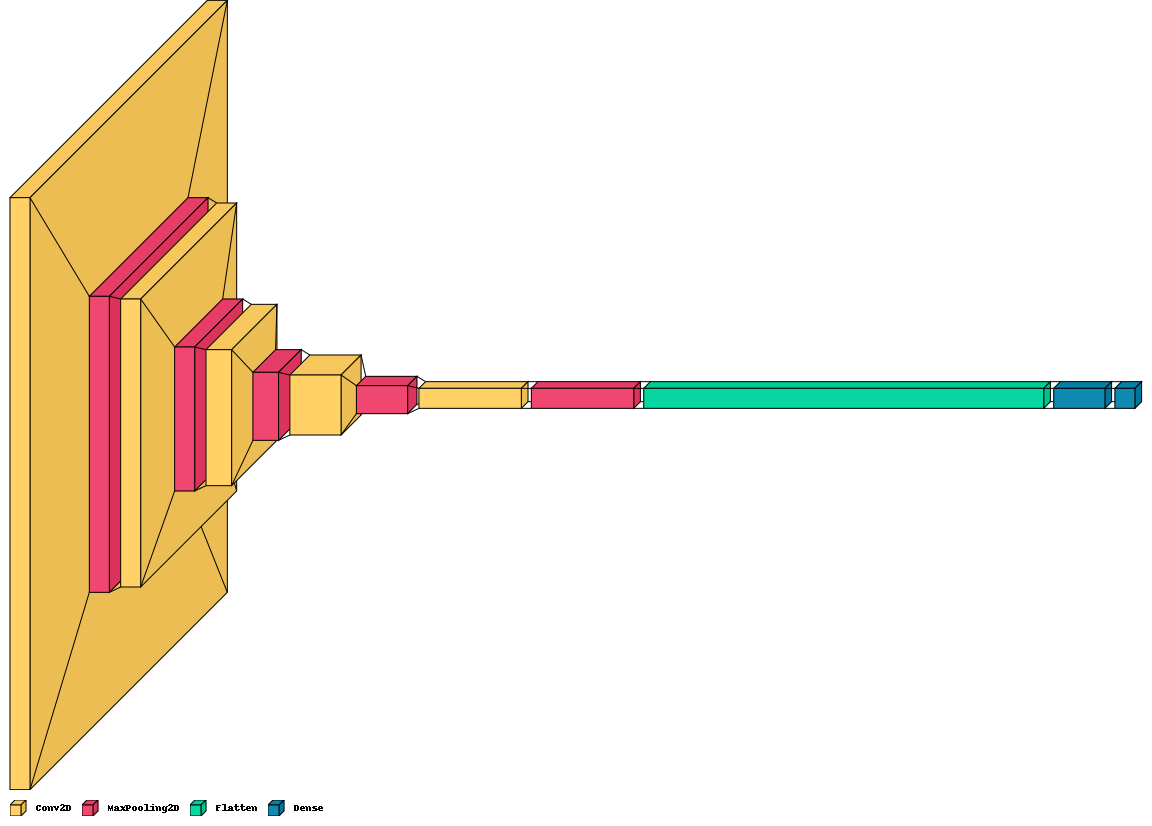

In [5]:
import visualkeras

visualkeras.layered_view(model, legend=True)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

# 6 Methodology
**Loss Function Definition**
For this task, I used **Binary Crossentropy Loss Function** as the loss function. It is well-suited for problems where each example in the dataset belongs to one of two classes (positive or negative). The formula for Binary Crossentropy loss is as follows:

$$BCL = \frac{1}{M}\sum_{c=1}^My_{o,c}\log(p_{o,c})$$

This formulation makes the loss sensitive to the correctness of the model's predictions for both positive and negative examples.

**Model Optimizer**

The model use **RMSProp** for model optimization. It is an optimization algorithm commonly used in training artificial neural networks. It is designed to address some of the limitations of earlier optimization algorithms, particularly issues related to adapting the learning rates for each parameter during training. The update rule is defined as follows:

$$
 E[g^2]_t = \beta E[g^2]_{t-1} + (1 - \beta) (\nabla J(\theta_t))^2 
$$

$$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla J(\theta_t) $$

Where:
- $ \theta_t $ is the parameter vector at time $ t $.
- $ \nabla J(\theta_t) $ is the gradient of the loss function with respect to the parameters at time $ t $.
- $ E[g^2]_t $ is the exponentially decaying average of squared gradients at time $ t $.
- $ \beta $ is a decay factor.
- $ \eta $ is the learning rate.
- $ \epsilon $ is a small constant added to the denominator for numerical stability.

**Activation Function**

For the task, I used ReLU(Rectified Linear Unit) and Sigmoid as the activation function.

ReLU's primary purpose is to introduce non-linearity to the network, allowing it to learn complex patterns and relationships in the data. It can be defined mathematically as follows:

$$ReLU(x) = max(0, x)$$

In this formula:

- x represents the input to the ReLU function.
- The function outputs 0 if x is negative or x itself if x is non-negative.

Graphically, the ReLU function looks like a ramp, allowing all positive values to pass through unchanged, while setting all negative values to zero. 
The sigmoid function, also known as the logistic function, is defined mathematically as follows:

$$ \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}} $$

In this formula:

- $ x $ represents the input to the sigmoid function.
- $ e $ is the base of the natural logarithm.

The sigmoid function outputs values in the range (0, 1). As $ x $ becomes very large, the denominator $1 + e^{-x}$ approaches $1$, causing the sigmoid function to approach $1$. Similarly, as $ x $ becomes very small (approaching negative infinity), the term $e^{-x}$ dominates the denominator, and the sigmoid function approaches $0$. It typically used to prevent the model to output a negative value for binary classification ($0$ for negative result, $1$ for positive result).

# 7 Dataset

For this task, I divided the dataset equally by male or female. For smilling set and non-smilling set, 80% of them used as training set, 10% of them used as validation set, 10% used as test set, ensuring the ratio of male and female is almost 1:1 for three sets.

# 8 Results

Locating the Data folder, loading the dataset into memory.

In [1]:
import os, shutil
import keras
base_dir = 'D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_advanced'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [24]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


**Building Model**

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

**Compile and Training**

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=valid_generator,
      validation_steps=400//20)

C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == "":


Epoch 1/10
100/100 [==============================] - 124s 1s/step - loss: 0.6633 - acc: 0.5810 - val_loss: 0.5706 - val_acc: 0.7200
Epoch 2/10
100/100 [==============================] - 133s 1s/step - loss: 0.4815 - acc: 0.7740 - val_loss: 0.4094 - val_acc: 0.8275
Epoch 3/10
100/100 [==============================] - 143s 1s/step - loss: 0.3203 - acc: 0.8730 - val_loss: 0.2734 - val_acc: 0.8875
Epoch 4/10
100/100 [==============================] - 144s 1s/step - loss: 0.2247 - acc: 0.9110 - val_loss: 0.2377 - val_acc: 0.9050
Epoch 5/10
100/100 [==============================] - 143s 1s/step - loss: 0.1869 - acc: 0.9325 - val_loss: 0.1850 - val_acc: 0.9350
Epoch 6/10
100/100 [==============================] - 143s 1s/step - loss: 0.1562 - acc: 0.9430 - val_loss: 0.1787 - val_acc: 0.9350
Epoch 7/10
100/100 [==============================] - 142s 1s/step - loss: 0.1262 - acc: 0.9530 - val_loss: 0.1907 - val_acc: 0.9225
Epoch 8/10
100/100 [==============================] - 141s 1s/step - 

In [5]:
model.save('D:\\desktop\\bupt\\ML\\Mini_Project\\advanced.h5')

**Training History**

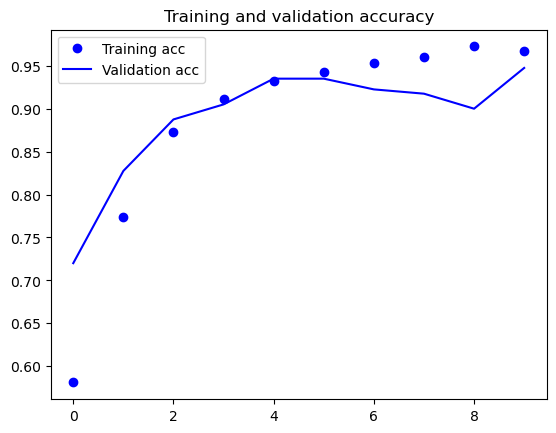

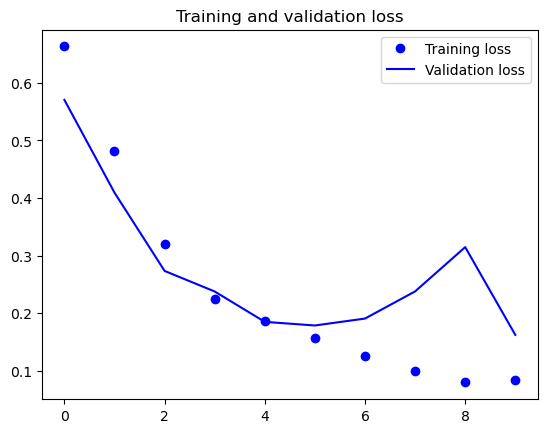

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**One Sample Test**

In [21]:
import tensorflow.keras as keras
import numpy as np
model = keras.models.load_model('D:\\desktop\\bupt\\ML\\Mini_Project\\advanced.h5')
#Male case
img_path='D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_advanced\\test\\A\\file0042.jpg'
img = keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)/255.0
img_tensor = np.expand_dims(img_tensor, axis=0)
prediction =model.predict(img_tensor)  
print(prediction)
if prediction[0][0]>0.5:
    result='Female'
else:
    result='Male'
print(result)
#Female case
img_path='D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_advanced\\test\\B\\file0091.jpg'
img = keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)/255.0
img_tensor = np.expand_dims(img_tensor, axis=0)
prediction =model.predict(img_tensor)  
print(prediction)
if prediction[0][0]>0.5:
    result='Female'
else:
    result='Male'
print(result)

1/1 [==============================] - 0s 92ms/step
[[0.00027258]]
Male
1/1 [==============================] - 0s 45ms/step
[[0.9999708]]
Female


**Evaluation**

In [25]:
score = model.evaluate_generator(
  test_generator,
  steps=400//20,
  max_queue_size=10,
  workers=1,
  use_multiprocessing=False,
  verbose=0)
print("loss: %.6f - acc: %.6f" % (score[0], score[1]))

C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


loss: 0.229494 - acc: 0.920000


# 9 Conclusions

How Accuracy varies per epoch is shown below:

![jupyter](./acc_advanced.png)

In this experiment, I design a convolutional neural network model to  determine the gender in the image on the set.

The detail of training parameter is defined as follows:
1. steps_per_epoch=100
2. epochs=10
3. batch_size=20
4. input_shape=(150, 150, 3)

Analyzing the figure, we can see that:

with the epoches increasing, the Accuracy increases at the same time. It shows that the model actually had learnt something in the image not just guessing a answer. The Acc on training set is almost same on the validation set. It shows the high performance of the model.

In general, we can conclude that:
* The CNN is an interesting method for Feature extraction from image
* In this task, We achieved a training accuracy of 0.96, a validation accuracy of 0.94, a test accuracy of 0.92.
* In future, we can try some different datasets to improve the generalization ability of the model